In [18]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_dataset = pathlib.Path("/kaggle/input/weed-dataset/train_dataset")
test_dataset = pathlib.Path("/kaggle/input/weed-dataset")
datasetweed = pathlib.Path("/kaggle/input/weed-dataset")

In [20]:
image_count_train = len(list(train_dataset.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_dataset.glob('*/*.jpg')))
print(image_count_test)

725
245


In [21]:
batch_size = 32
img_height = 180
img_width = 180

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                       shuffle=True,
                                                       batch_size=batch_size,
                                                       image_size=(img_height,img_width),
                                                       validation_split = 0.2,
                                                       subset='training',
                                                       seed=123)


Found 725 files belonging to 2 classes.
Using 580 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                     shuffle=True,
                                                     batch_size=batch_size,
                                                     image_size=(img_height,img_width),
                                                     validation_split = 0.2,
                                                     subset='validation',
                                                     seed=123)

Found 725 files belonging to 2 classes.
Using 145 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Riddlerzuring', 'Rumix']
2


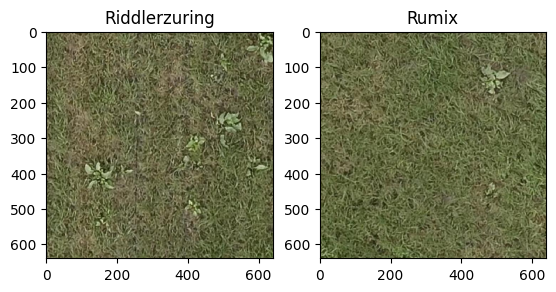

In [25]:
plt.figure(figsize=(10,10))
for i in range(2):
  ax = plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(train_dataset.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling

num_classes = 2
model = Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(11,11), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(len(class_names), activation='softmax'))


In [31]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 256)    │     3,965,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,468,226 (17.04 MB)

 Trainable params: 4,468,226 (17.04 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5104 - loss: 1.3119 - val_accuracy: 0.4897 - val_loss: 0.6945
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4424 - loss: 0.6952 - val_accuracy: 0.4897 - val_loss: 0.6933
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4856 - loss: 0.6933 - val_accuracy: 0.4897 - val_loss: 0.6935
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4940 - loss: 0.6917 - val_accuracy: 0.4897 - val_loss: 0.6932
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4672 - loss: 0.6931 - val_accuracy: 0.4897 - val_loss: 0.6938


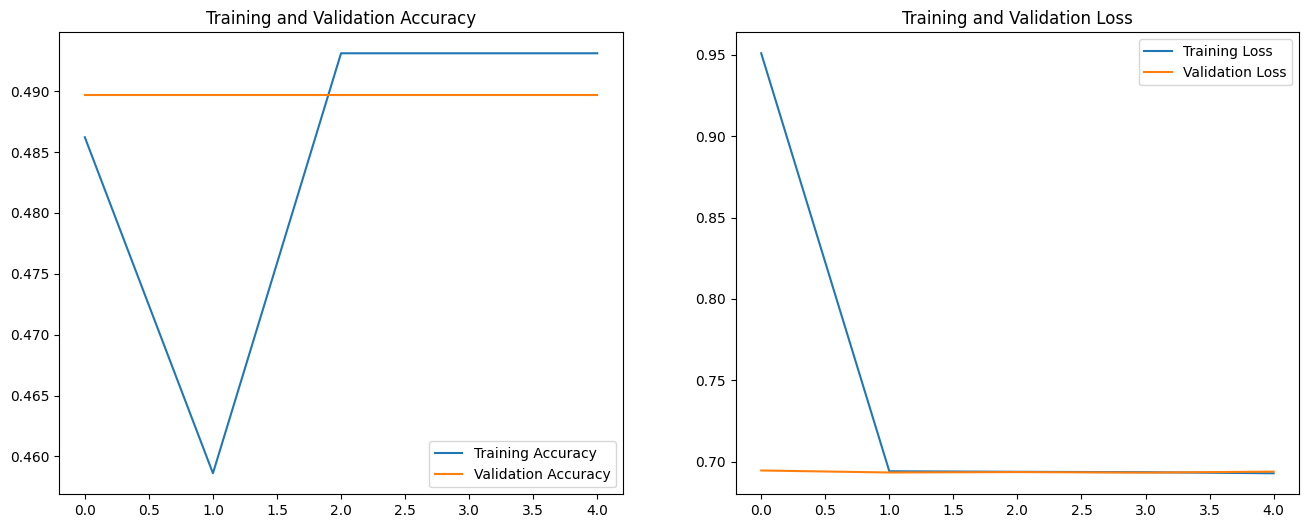

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.1)
])

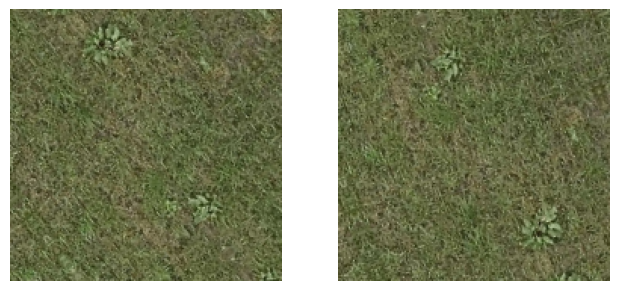

In [36]:
plt.figure(figsize=(12, 12))
for images in train_ds.take(1):
    for i in range(2):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

In [37]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(len(class_names),activation='softmax'))

In [38]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 256)    │     3,965,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,468,226 (17.04 MB)

 Trainable params: 4,468,226 (17.04 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5244 - loss: 0.8827 - val_accuracy: 0.4897 - val_loss: 0.6934
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.4897 - val_loss: 0.6936
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5294 - loss: 0.6909 - val_accuracy: 0.4897 - val_loss: 0.6933
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4924 - loss: 0.6929 - val_accuracy: 0.4897 - val_loss: 0.6935
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4919 - loss: 0.6920 - val_accuracy: 0.4897 - val_loss: 0.6936


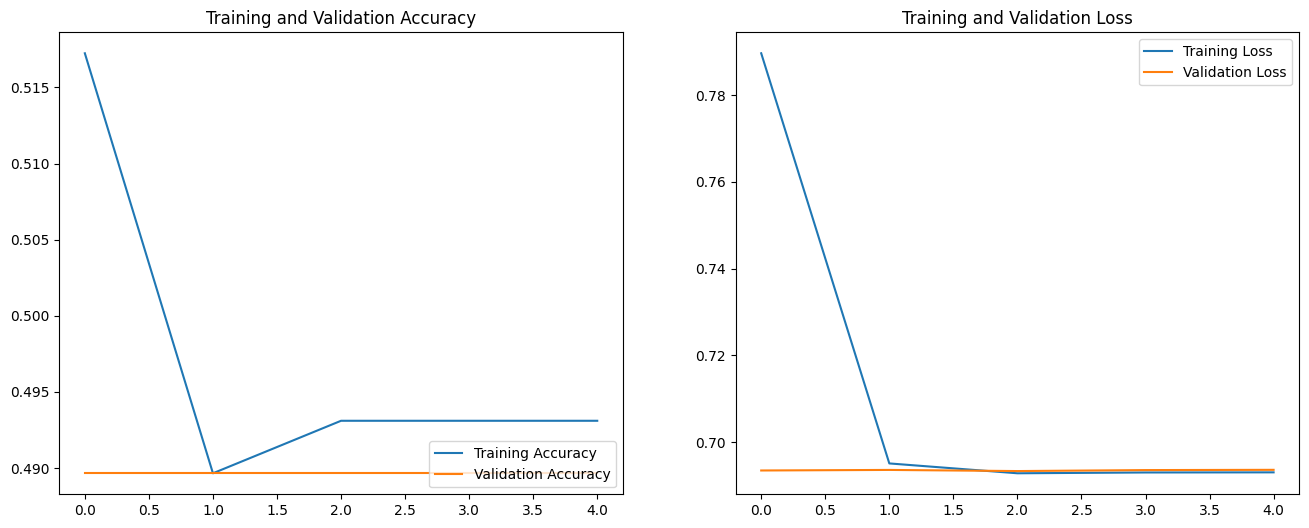

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
path_list=[]
lesion_list=[]
for i in class_names:
    for j in train_dataset.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/kaggle/input/weed-dataset/train_dataset/Riddl...,Riddlerzuring
1,/kaggle/input/weed-dataset/train_dataset/Riddl...,Riddlerzuring
2,/kaggle/input/weed-dataset/train_dataset/Riddl...,Riddlerzuring
3,/kaggle/input/weed-dataset/train_dataset/Riddl...,Riddlerzuring
4,/kaggle/input/weed-dataset/train_dataset/Riddl...,Riddlerzuring
...,...,...
720,/kaggle/input/weed-dataset/train_dataset/Rumix...,Rumix
721,/kaggle/input/weed-dataset/train_dataset/Rumix...,Rumix
722,/kaggle/input/weed-dataset/train_dataset/Rumix...,Rumix
723,/kaggle/input/weed-dataset/train_dataset/Rumix...,Rumix


In [43]:
original_df['Label'].value_counts()

Label
Rumix            368
Riddlerzuring    357
Name: count, dtype: int64

In [46]:
class_names = ['Ridderzuring', 'Rumix']
print(class_names)


# Function to prepare and load images in the required image size
def load_and_prep_image(filename, img_shape=180):
  # read on the image
  img=tf.io.read_file(filename)
  # decode the image
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img, size=[img_shape, img_shape])
  #rescale the image and normalize
  img=img/255.
  return img

# Predicting on given image
def pred_plot(model, filename, class_name=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0), verbose=0)
    pred_class_index = tf.argmax(pred, axis=1).numpy()[0]  # Convert to numpy array and get the first element
    pred_class = class_name[pred_class_index]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()


# Predict on random images from given directories 
def random_predict(model, target_dir, sample_size=9):
  target_folder=target_dir
  random_images = random.sample(os.listdir(target_folder), sample_size)

  plt.figure(figsize=(10, 10))  # Adjust the figure size

  for i in range(sample_size):
    plt.subplot(3, 3, i + 1)
    img = os.path.join(target_folder, random_images[i])
    pred_plot(model,f"{img}")
plt.show()  

['Ridderzuring', 'Rumix']


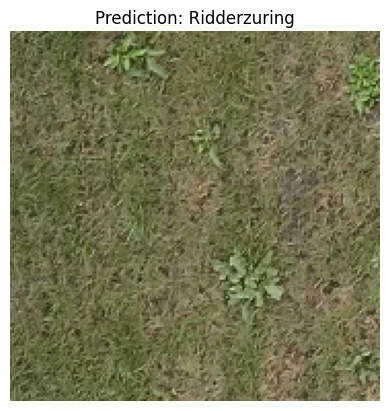

In [48]:
pred_plot(model, "/kaggle/input/weed-dataset/train_dataset/Riddlerzuring/ridderzuring_0797_jpg.rf.15ad25a9f0e86c8a53e323e34dcac1f7.jpg")